In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv(r"Social_Network_Ads.csv")
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
dataset.drop(columns="EstimatedSalary" , inplace=True)

In [5]:
dataset.head()

,Age,Purchased
0,19,0
1,35,0
2,26,0
3,27,0
4,19,0


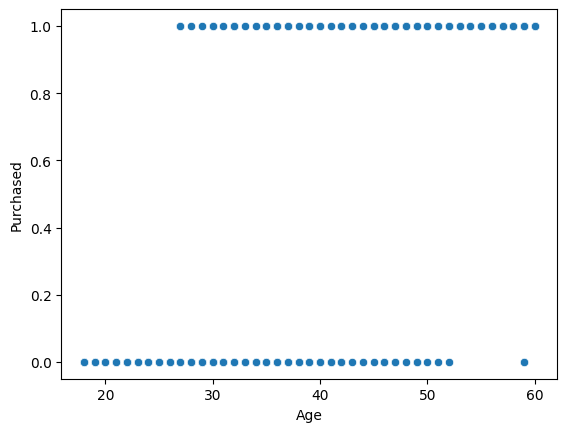

In [6]:
sns.scatterplot(x = "Age" , y = "Purchased" , data = dataset)
plt.show()

In [7]:
x = dataset[["Age"]]
y = dataset["Purchased"]
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42) 


In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train , y_train)

LogisticRegression()

In [9]:
lr.score(x_test , y_test)*100

91.25

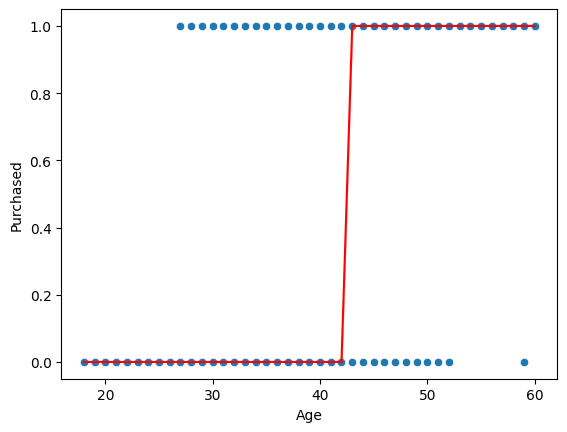

In [10]:
sns.scatterplot(x = "Age" , y = "Purchased" , data = dataset)
sns.lineplot( x= "Age" , y = lr.predict(x) , data = dataset , color = "red")
plt.show()

In [11]:
lr.predict([[20]])

C:\Users\anura\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

# Multiple Input 

In [12]:
dataset2 = pd.read_csv("placement.csv")
dataset2.head()

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


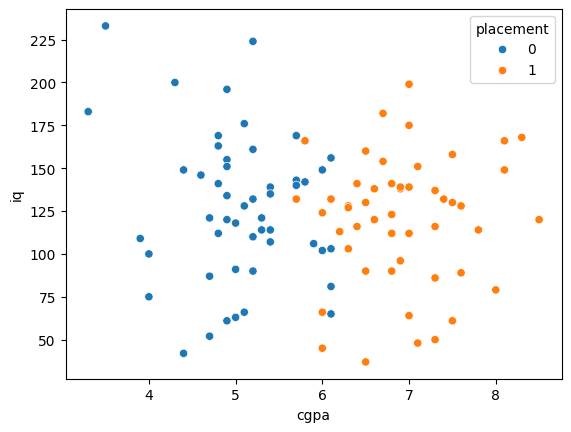

In [13]:
sns.scatterplot(x = "cgpa" , y = "iq"  , data = dataset2 , hue="placement")
plt.show()

In [14]:
x = dataset2.iloc[:,:-1]
y = dataset2["placement"]
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.2 , random_state=42)
                           

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr = LogisticRegression()
lr.fit(x_train, y_train)


LogisticRegression()

In [17]:
lr.score(x_test , y_test)*100

85.0

C:\Users\anura\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

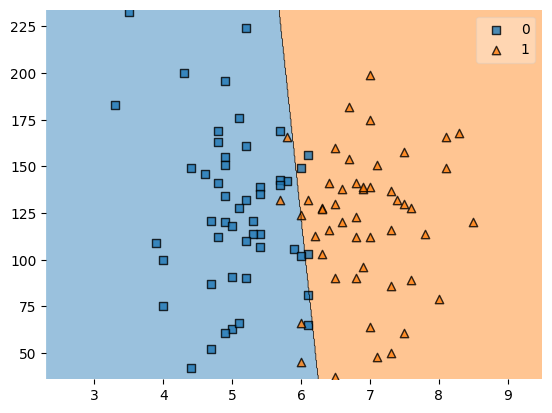

In [18]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy() , y.to_numpy() , clf=lr )
plt.show

In [19]:
lr.coef_

array([[3.08692655, 0.00887102]])

In [20]:
lr.intercept_

array([-19.61194721])

# Polynomial Inputs

In [51]:
dataset2.head()

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


<Axes: xlabel='cgpa', ylabel='iq'>

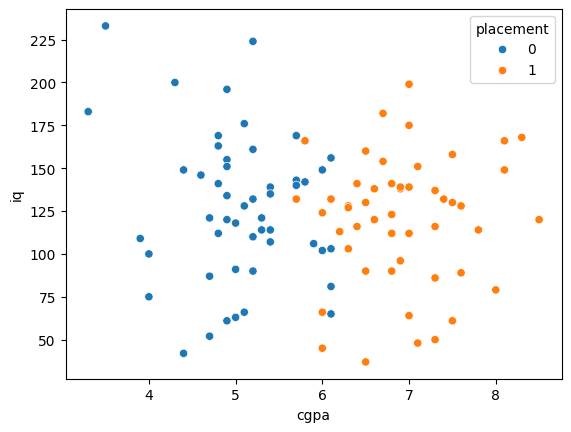

In [52]:
sns.scatterplot(x = "cgpa" , y = "iq" , data=dataset2 , hue = "placement")

In [53]:
x = dataset2.iloc[:,:-1]
y = dataset2["placement"]


In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [59]:
pf = PolynomialFeatures(degree=4)
pf.fit(x)
x = pd.DataFrame(pf.transform(x))

In [60]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.2 , random_state=42)


In [61]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\anura\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
lr.score(x_test , y_test)*100

95.0